In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt

In [3]:
idxs = np.arange(656, 704)

In [4]:
tpfs = []
for idx in np.arange(656, 656 + 18):
    tpfs.append(lk.search_targetpixelfile(f"EPIC 200068{idx}", mission='k2').download())

In [71]:
len(tpfs)

10

In [70]:
for idx in np.arange(656 + 10, 656 + 18):
    tpfs.append(lk.search_targetpixelfile(f"EPIC 200068{idx}", mission='k2').download())

KeyboardInterrupt: 

In [72]:
from kbackground import Estimator

In [162]:
rows, columns, fluxs, cadencenos = [], [], [], []
for tpf in tpfs:
    column, row = np.meshgrid(np.arange(tpf.column, tpf.shape[2] + tpf.column), np.arange(tpf.row, tpf.shape[1] + tpf.row))
    aper = np.ones(tpf.shape[1:], bool)
    rows.append(row[aper])
    columns.append(column[aper])
    fluxs.append(tpf.flux.value[:, aper])
    cadencenos.append(tpf.cadenceno)

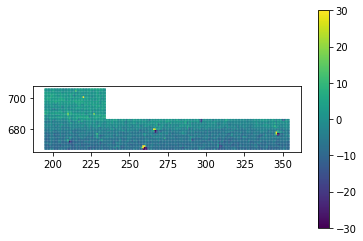

In [163]:
plt.scatter(np.hstack(columns), np.hstack(rows), s=1, c=e.flux[870] - np.median(e.flux, axis=0)[None, :], vmin=-30, vmax=30)
plt.gca().set_aspect('equal')
plt.colorbar()

In [164]:
e = Estimator(np.hstack(rows), np.hstack(columns), np.hstack(fluxs), cadencenos[0])

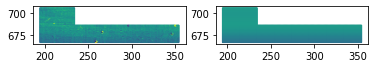

In [173]:
tdx = 850
fig, ax = plt.subplots(1, 2)
ax[0].scatter(np.hstack(columns), np.hstack(rows), s=1, c=e.flux[tdx] - np.median(e.flux, axis=0)[None, :], vmin=-30, vmax=30)
ax[0].set_aspect('equal')

ax[1].scatter(np.hstack(columns), np.hstack(rows), s=1, c=e.model(e.cadenceno[tdx]), vmin=-30, vmax=30)
ax[1].set_aspect('equal')


<AxesSubplot:title={'center':'Target ID: 200068665, Cadence: 119907'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

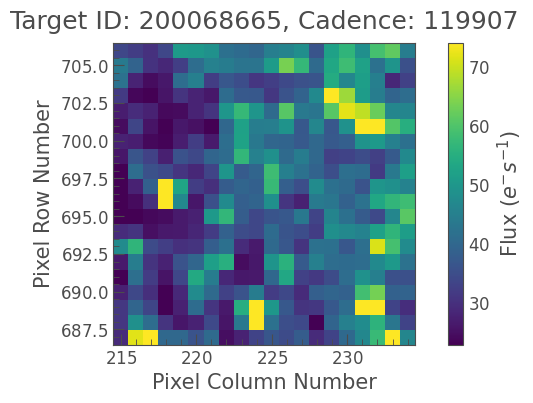

In [83]:
tpf.plot()

In [79]:
from copy import deepcopy

In [80]:
tpf2 = deepcopy(tpf)

In [81]:
tpf2 *= 0

In [82]:
tpf2 += model.reshape(tpf.shape)

ValueError: cannot reshape array of size 14020000 into shape (3505,20,20)

In [71]:
tpf2[300:1200].animate()

In [62]:
tpf[300:1200].animate()